In [1]:
import numpy as np
import pyuvdata
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
sys.path.append("/Users/ruby/Astro/rlb_LWA")
import dsa2000_sensitivity
import importlib
importlib.reload(dsa2000_sensitivity)

<module 'dsa2000_sensitivity' from '/Users/ruby/Astro/rlb_LWA/dsa2000_sensitivity.py'>

In [2]:
#antlocs_filepath = "/Users/ruby/Astro/20210226W.cfg"
c = 3e8
min_freq_hz = 0.7e9
max_freq_hz = 2e9
freq_21cm_hz = c/0.21
#antenna_diameter_m = 5
vis_noise = 1.

In [3]:
antpos = dsa2000_sensitivity.get_antpos()

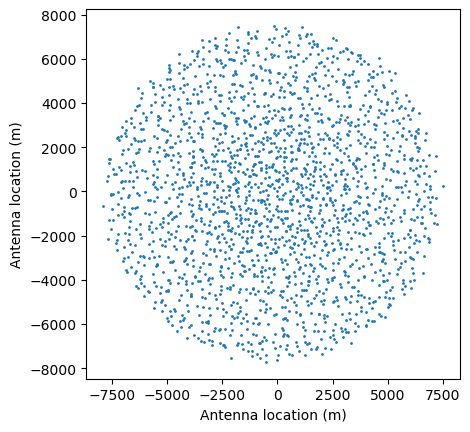

In [4]:
fig, ax = plt.subplots()
ax.scatter(antpos[:,0], antpos[:,1], s=1)
ax.set_aspect(1)
ax.set_xlabel("Antenna location (m)")
ax.set_ylabel("Antenna location (m)")
plt.show()

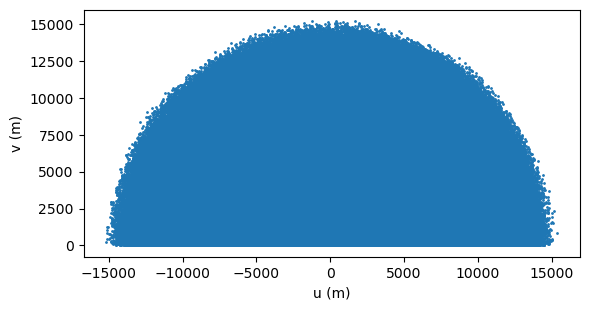

In [5]:
baselines_m = dsa2000_sensitivity.get_baselines(antpos)
fig, ax = plt.subplots()
ax.scatter(baselines_m[:,0], baselines_m[:,1], s=1)
ax.set_aspect(1)
ax.set_xlabel("u (m)")
ax.set_ylabel("v (m)")
plt.show()

In [6]:
u_coords, v_coords, weights_mat, weights_squared_mat = dsa2000_sensitivity.create_var_matrix(
    baselines_m,
    freq_hz=c/.21,
    uv_spacing=5,
)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [ ]:
uv_plane_variance = weights_squared_mat/weights_mat

In [ ]:
fig, ax = plt.subplots()
use_cmap = cm.get_cmap("inferno").copy()
cax = ax.imshow(
    uv_plane_variance,
    origin="lower",
    interpolation="none",
    extent=[np.min(u_coords), np.max(u_coords), np.min(v_coords), np.max(v_coords)],
    vmin=0,
    cmap=use_cmap,
)
ax.set_xlabel("u (wavelengths)")
ax.set_ylabel("v (wavelengths)")
ax.grid(linewidth=.5)
cbar = fig.colorbar(cax, extend="max")
cbar.set_label("N Samples", rotation=270, labelpad=15)

In [ ]:
np.sqrt(10.6 / np.pi)

In [ ]:
180./1.8368682025524263*.5